<a href="https://colab.research.google.com/github/suryam3107/MAJOR_PROJECT/blob/main/MAJOR_PROJECT_COVID_19_PANDEMIC_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE MAJOR PROJECT - COVID 19 PANDEMIC ANALYSIS**

**PREPROCESSING OF DATA**

In [ ]:
#Preprocessing of data
# Import all crucial libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Import the dataset 
df = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')

In [ ]:
df.shape

(94158, 59)

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94158 entries, 0 to 94157
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               94158 non-null  object 
 1   continent                              89705 non-null  object 
 2   location                               94158 non-null  object 
 3   date                                   94158 non-null  object 
 4   total_cases                            91157 non-null  float64
 5   new_cases                              91154 non-null  float64
 6   new_cases_smoothed                     90144 non-null  float64
 7   total_deaths                           81202 non-null  float64
 8   new_deaths                             81357 non-null  float64
 9   new_deaths_smoothed                    90144 non-null  float64
 10  total_cases_per_million                90670 non-null  float64
 11  ne

In [ ]:
# Handling null or missing values
df.isnull().sum()

iso_code                                     0
continent                                 4453
location                                     0
date                                         0
total_cases                               3001
new_cases                                 3004
new_cases_smoothed                        4014
total_deaths                             12956
new_deaths                               12801
new_deaths_smoothed                       4014
total_cases_per_million                   3488
new_cases_per_million                     3491
new_cases_smoothed_per_million            4496
total_deaths_per_million                 13430
new_deaths_per_million                   13275
new_deaths_smoothed_per_million           4496
reproduction_rate                        18215
icu_patients                             84650
icu_patients_per_million                 84650
hosp_patients                            82353
hosp_patients_per_million                82353
weekly_icu_ad

In [ ]:
temp = df[['total_deaths','new_deaths']].dropna()
(temp['total_deaths']==temp['new_deaths']).value_counts()

False    81010
True       190
dtype: int64

In [ ]:
df = df.drop(columns=['stringency_index','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million'])
df = df.drop(columns=['reproduction_rate','icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions','weekly_hosp_admissions_per_million','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','positive_rate','tests_per_case','tests_units'])

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(94158, 19)

In [ ]:
# Replace null values
col = ['total_cases','new_cases','new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed','new_tests','total_tests','total_tests_per_thousand','total_vaccinations','people_vaccinated','people_fully_vaccinated','new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred']
df[col]=df[col].fillna(0)

In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94153,ZWE,Africa,Zimbabwe,2021-06-03,39092.0,61.0,34.000,1604.0,5.0,1.714,1817.0,557596.0,37.516,1048504.0,684164.0,364340.0,8290.0,13588.0,7.05
94154,ZWE,Africa,Zimbabwe,2021-06-04,39144.0,52.0,32.286,1605.0,1.0,1.857,2291.0,559887.0,37.670,1056238.0,685564.0,370674.0,7734.0,11349.0,7.11
94155,ZWE,Africa,Zimbabwe,2021-06-05,39168.0,24.0,33.571,1605.0,0.0,1.571,1932.0,561819.0,37.800,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14
94156,ZWE,Africa,Zimbabwe,2021-06-06,39189.0,21.0,35.000,1606.0,1.0,1.714,1048.0,562867.0,37.871,0.0,0.0,0.0,0.0,0.0,0.00


In [ ]:
df2 = df.copy().select_dtypes(exclude = 'object')

In [ ]:
x = df2.drop('new_cases',axis=1)
y = df2['new_cases']

In [ ]:
#Splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y,test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred # Predicted Output

array([3.48823584e+02, 5.58513045e+01, 6.92542555e+03, ...,
       7.24833475e+00, 2.32855845e+02, 9.49173784e+03])

In [ ]:
y_test.values

array([3.5700e+02, 7.2000e+01, 7.3900e+03, ..., 2.0000e+00, 1.7800e+02,
       1.0491e+04])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_pred,y_test,squared=False))

0.9880610972571017
3998.356842734723


In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
# Predicted Output
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_pred,y_test,squared=False))

[13:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9873227122819875
4120.145161882816


In [ ]:
col_cat = df.select_dtypes(include='object').columns.values

In [ ]:
df3 = df.copy()
df3.head(1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Method 1
# For Using Count or frequency encoding
for col in col_cat:
  # Map the column with dictionary
  df3[col] = df3[col].map(df3[col].value_counts().to_dict())

In [ ]:
# Scaling of the data
ss = StandardScaler()
train = ss.fit_transform(X_train)

In [ ]:
train

array([[-0.1385731 , -0.1505368 , -0.15422829, ..., -0.07654663,
        -0.07995801, -0.23135433],
       [-0.14011009, -0.14812253, -0.15214652, ..., -0.07654663,
        -0.07995801, -0.23135433],
       [-0.14201486, -0.15338584, -0.15508354, ..., -0.07654663,
        -0.07995801, -0.23135433],
       ...,
       [-0.14172936, -0.15472455, -0.15426144, ..., -0.07654663,
        -0.07995801, -0.23135433],
       [ 0.45227061,  0.10083188,  0.55013341, ...,  0.07585756,
         0.1275503 , -0.19836517],
       [-0.14213193, -0.15539964, -0.15512332, ..., -0.07654663,
        -0.07995801, -0.23135433]])

In [ ]:
train.shape

(63085, 14)

In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94153,ZWE,Africa,Zimbabwe,2021-06-03,39092.0,61.0,34.000,1604.0,5.0,1.714,1817.0,557596.0,37.516,1048504.0,684164.0,364340.0,8290.0,13588.0,7.05
94154,ZWE,Africa,Zimbabwe,2021-06-04,39144.0,52.0,32.286,1605.0,1.0,1.857,2291.0,559887.0,37.670,1056238.0,685564.0,370674.0,7734.0,11349.0,7.11
94155,ZWE,Africa,Zimbabwe,2021-06-05,39168.0,24.0,33.571,1605.0,0.0,1.571,1932.0,561819.0,37.800,1061951.0,686636.0,375315.0,5713.0,8498.0,7.14
94156,ZWE,Africa,Zimbabwe,2021-06-06,39189.0,21.0,35.000,1606.0,1.0,1.714,1048.0,562867.0,37.871,0.0,0.0,0.0,0.0,0.0,0.00


**FORECASTING USING FbProphet FOR 30 DAYS**

In [ ]:
# Forecasting for 30 days

In [ ]:
df1 = df[39391:39421]    #Data for 30 days taking India and USA as reference
df2 = df[89711:89741]
frames = [df1, df2]
df = pd.concat(frames, sort=False)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred
39391,IND,Asia,India,2021-05-07,21892676.0,401078.0,389672.429,238270.0,4187.0,3773.857,1826490.0,298601699.0,216.377,165190000.0,132294827.0,32895173.0,2586397.0,1884556.0,11.97
39392,IND,Asia,India,2021-05-08,22296081.0,403405.0,391232.000,242347.0,4077.0,3829.286,1808344.0,300410043.0,217.688,167493857.0,133366482.0,34127375.0,2303857.0,1981076.0,12.14
39393,IND,Asia,India,2021-05-09,22662575.0,366494.0,391008.286,246116.0,3769.0,3879.571,1865428.0,302275471.0,219.040,168304868.0,133854676.0,34450192.0,811011.0,2013337.0,12.20
39394,IND,Asia,India,2021-05-10,22992517.0,329942.0,387097.714,249992.0,3876.0,3940.571,1474606.0,303750077.0,220.108,171098918.0,135192013.0,35906905.0,2794050.0,2145255.0,12.40
39395,IND,Asia,India,2021-05-11,23340938.0,348421.0,382279.857,254197.0,4205.0,4001.286,1850110.0,305600187.0,221.449,173862643.0,136557345.0,37305298.0,2763725.0,2301699.0,12.60
39396,IND,Asia,India,2021-05-12,23703665.0,362727.0,375179.286,258317.0,4120.0,4021.286,1983804.0,307583991.0,222.886,176045577.0,137805245.0,38240332.0,2182934.0,2302048.0,12.76
39397,IND,Asia,India,2021-05-13,24046809.0,343144.0,365030.143,262317.0,4000.0,4033.429,1864594.0,309448585.0,224.237,178361846.0,139087590.0,39274256.0,2316269.0,2251178.0,12.92
39398,IND,Asia,India,2021-05-14,24372907.0,326098.0,354318.714,266207.0,3890.0,3991.000,1875515.0,311324100.0,225.596,179646413.0,139861462.0,39784951.0,1284567.0,2065202.0,13.02
39399,IND,Asia,India,2021-05-15,24684077.0,311170.0,341142.286,270284.0,4077.0,3991.000,1693093.0,313017193.0,226.823,181544536.0,141132112.0,40412424.0,1898123.0,2007240.0,13.16
39400,IND,Asia,India,2021-05-16,24965463.0,281386.0,328984.000,274390.0,4106.0,4039.143,0.0,0.0,0.000,182251006.0,141764335.0,40486671.0,706470.0,1992305.0,13.21


In [ ]:
df_india = df[df['location'] == 'India']
df_india.shape

(30, 19)

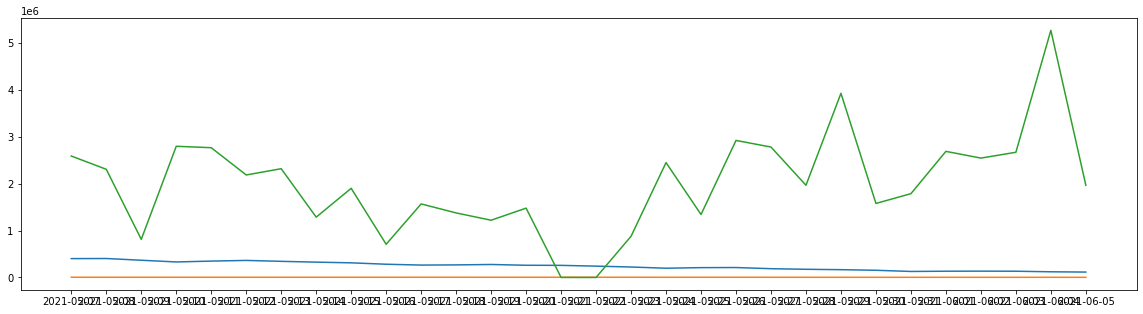

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_india['date'],df_india['new_cases'])
plt.plot(df_india['date'],df_india['new_deaths'])
plt.plot(df_india['date'],df_india['new_vaccinations'])

In [ ]:
df_us = df[df['location'] == 'United States']
df_us.shape

(30, 19)

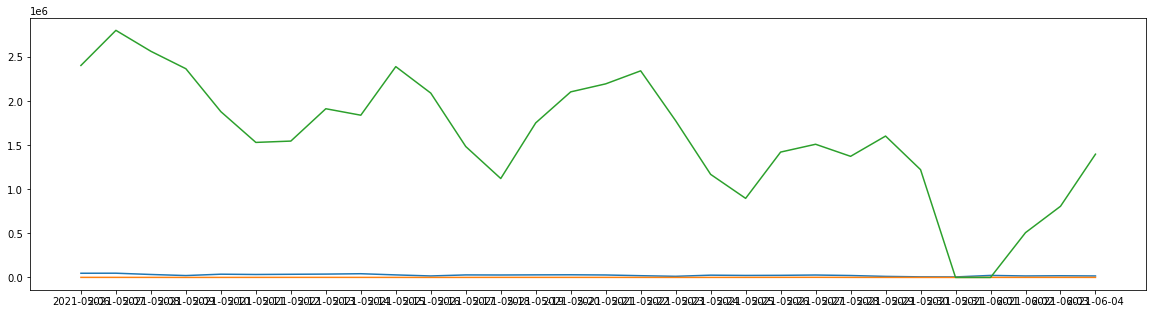

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_us['date'],df_us['new_cases'])
plt.plot(df_us['date'],df_us['new_deaths'])
plt.plot(df_us['date'],df_us['new_vaccinations'])

In [ ]:
df_india = df_india.rename(columns = {'total_cases':'y','date':'ds'})

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(df_india)
x = model.make_future_dataframe(periods = 30, freq = 'D')
forecast = model.predict(x)
forecast
df2 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
df2

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,trend,yhat_lower,yhat_upper,yhat
0,2021-05-07,2.189472e+07,2.189268e+07,2.189268e+07,2.189268e+07
1,2021-05-08,2.231421e+07,2.229608e+07,2.229608e+07,2.229608e+07
2,2021-05-09,2.265928e+07,2.266257e+07,2.266258e+07,2.266258e+07
3,2021-05-10,2.299225e+07,2.299252e+07,2.299252e+07,2.299252e+07
4,2021-05-11,2.333842e+07,2.334094e+07,2.334094e+07,2.334094e+07
5,2021-05-12,2.369753e+07,2.370366e+07,2.370367e+07,2.370366e+07
6,2021-05-13,2.403885e+07,2.404681e+07,2.404681e+07,2.404681e+07
7,2021-05-14,2.437496e+07,2.437291e+07,2.437291e+07,2.437291e+07
8,2021-05-15,2.470220e+07,2.468408e+07,2.468408e+07,2.468408e+07
9,2021-05-16,2.496217e+07,2.496546e+07,2.496546e+07,2.496546e+07


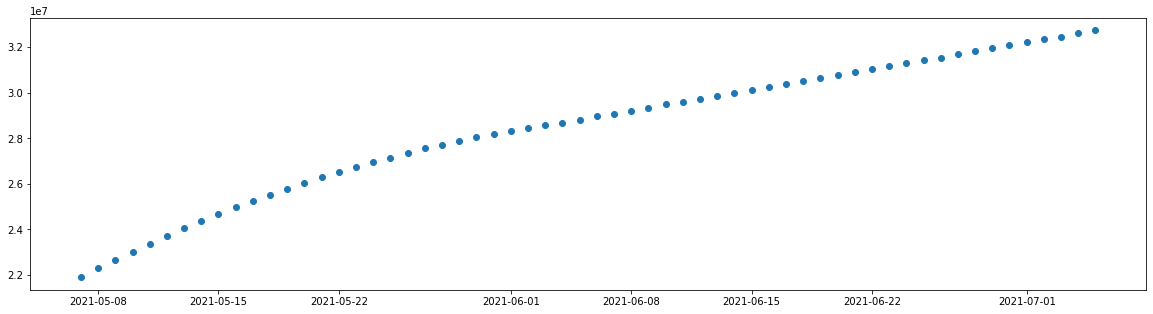

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(df2['ds'],df2['yhat'])

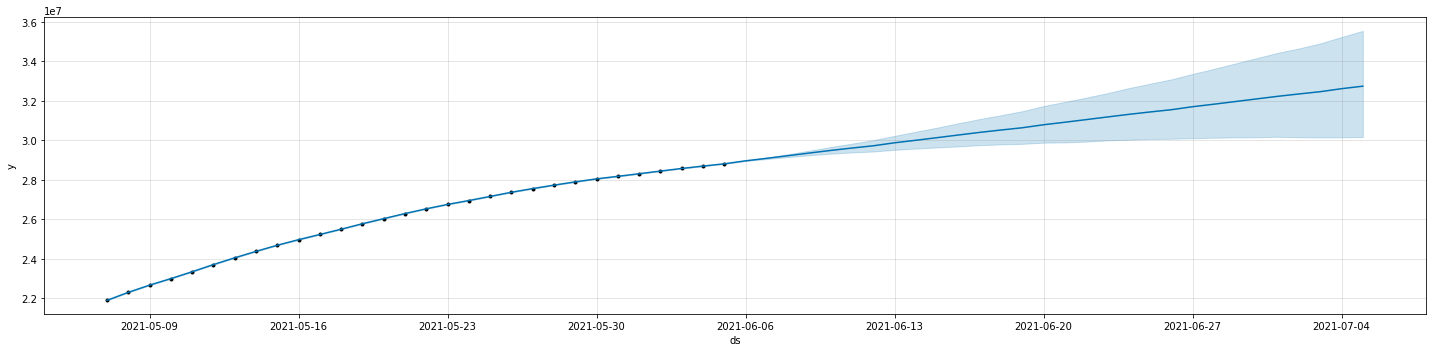

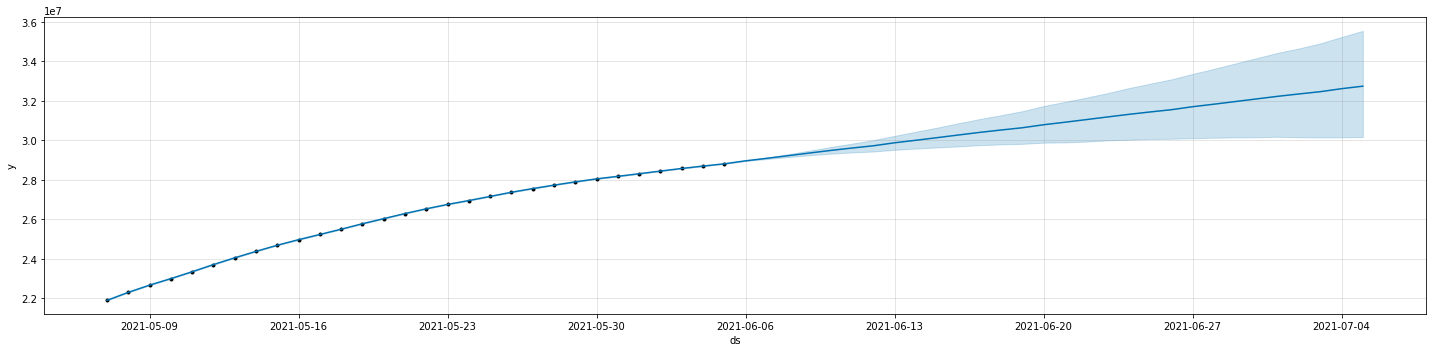

In [ ]:
#Pandas plotting
model.plot(forecast,figsize=(20,5))

In [ ]:
df_us = df_us.rename(columns = {'total_cases':'y','date':'ds'})

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(df_us)
x = model.make_future_dataframe(periods = 30, freq = 'D')
forecast = model.predict(x)
forecast
df2 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
df2

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,trend,yhat_lower,yhat_upper,yhat
0,2021-05-06,3.260882e+07,3.260902e+07,3.260902e+07,3.260902e+07
1,2021-05-07,3.265666e+07,3.265716e+07,3.265716e+07,3.265716e+07
2,2021-05-08,3.267926e+07,3.269083e+07,3.269083e+07,3.269083e+07
3,2021-05-09,3.271052e+07,3.271226e+07,3.271226e+07,3.271226e+07
4,2021-05-10,3.275811e+07,3.274907e+07,3.274907e+07,3.274907e+07
5,2021-05-11,3.278537e+07,3.278271e+07,3.278271e+07,3.278271e+07
6,2021-05-12,3.282086e+07,3.281855e+07,3.281855e+07,3.281855e+07
7,2021-05-13,3.285643e+07,3.285663e+07,3.285663e+07,3.285663e+07
8,2021-05-14,3.289839e+07,3.289889e+07,3.289889e+07,3.289889e+07
9,2021-05-15,3.291617e+07,3.292774e+07,3.292774e+07,3.292774e+07


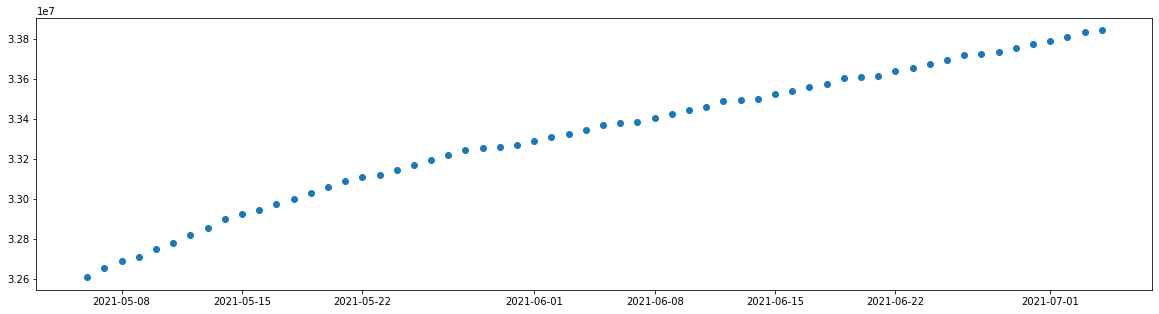

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(df2['ds'],df2['yhat'])

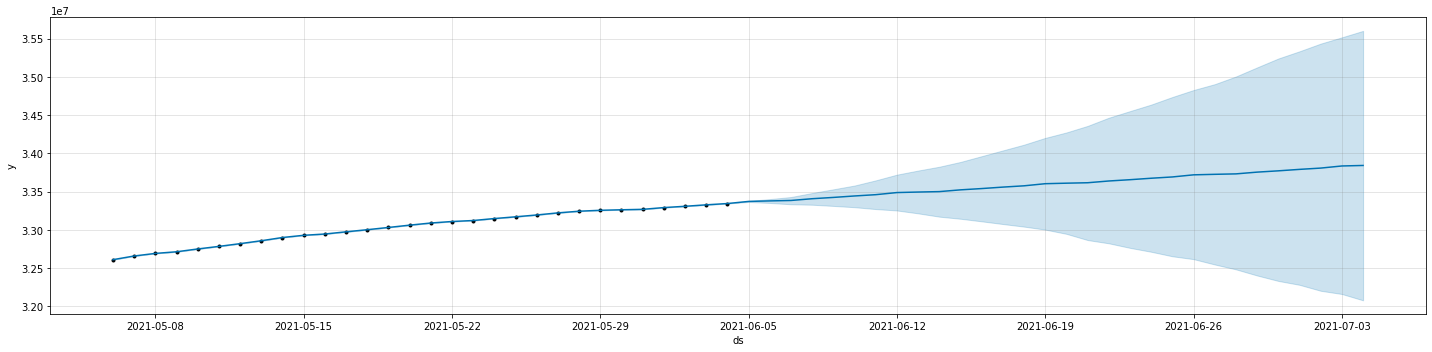

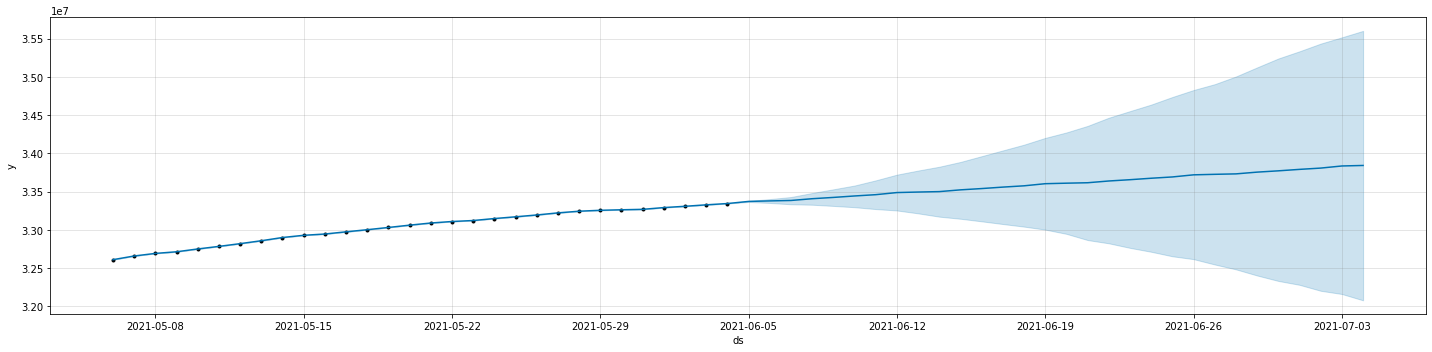

In [ ]:
#Pandas plotting
model.plot(forecast,figsize=(20,5))